In [20]:
import plotly.graph_objects as go 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [21]:
tb1b = pd.read_csv('table_1b.csv') 
tb3 = pd.read_csv('table_3.csv') 
tb1b['male'] = round(tb1b['kid_count'] * tb1b['inventor_g_m'])
tb1b['female'] = round(tb1b['kid_count'] * tb1b['inventor_g_f'])

## Q1
conclusion: Male kids seem to be more innovative then female (possibly biased because of data collection)

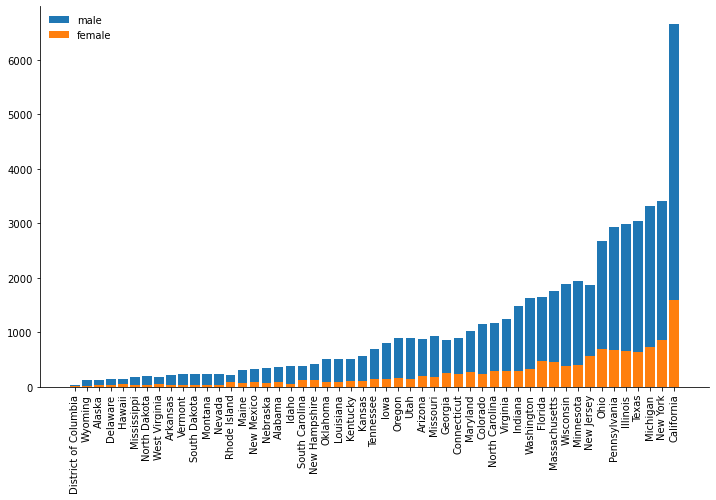

In [44]:
tb1b['total'] = tb1b['male'] + tb1b['female']

tb1b = tb1b.set_index('total')
tb1b = tb1b.sort_index(axis=0)

fig, ax = plt.subplots(figsize=(12,7))
ax.bar(tb1b['par_state'],tb1b['male'], label = 'male')
ax.bar(tb1b['par_state'],tb1b['female'], label = 'female')
plt.xticks(rotation=90)
ax.legend(frameon=False)
sns.despine()
plt.show()

tb1b = tb1b.reset_index()


## Q2
location

## raw population

In [46]:
tb1b['inventor_num'] = round(tb1b['inventor'] * tb1b['kid_count'])

fig = go.Figure(data=go.Choropleth( 
    locations=tb1b['par_stateabbrv'],
    z = tb1b['inventor_num'], 
    locationmode = 'USA-states', 
    colorscale = 'blues', 
    colorbar_title = "Inventors Number" 
)) 
 
fig.update_layout( 
    title_text = 'Innovators By States', 
    geo_scope='usa', 
) 

## population adjusted 

In [45]:
tb1b['inventor_10000'] = round(tb1b['inventor'] * 10000)

fig = go.Figure(data=go.Choropleth( 
    locations=tb1b['par_stateabbrv'],
    z = tb1b['inventor_10000'], 
    locationmode = 'USA-states', 
    colorscale = 'blues', 
    colorbar_title = "Inventors Number" 
)) 
 
fig.update_layout( 
    title_text = 'Innovators By States', 
    geo_scope='usa', 
) 

## Q3
parent income

In [28]:
states = list(tb1b['par_state'])
st = random.sample(states, 5)

In [29]:
income = tb1b[tb1b["par_state"].isin(st)].reset_index(drop=True)

In [30]:
income

,total,par_state,par_stateabbrv,kid_count,inventor,top5cit,inventor_cat_1,inventor_cat_2,inventor_cat_3,inventor_cat_4,...,top5cit_cat_2_pq_5,top5cit_cat_3_pq_5,top5cit_cat_4_pq_5,top5cit_cat_5_pq_5,top5cit_cat_6_pq_5,top5cit_cat_7_pq_5,male,female,inventor_num,inventor_10000
0,233.0,West Virginia,WV,101848,0.001149,0.000059,0.000177,0.000314,0.000138,0.000196,...,0.000168,0.000000,0.000000,0.000000,0.000084,0.000084,184.0,49.0,117.0,11.0
1,1044.0,Oregon,OR,199109,0.002642,0.000100,0.000206,0.000894,0.000271,0.000372,...,0.000051,0.000051,0.000025,0.000000,0.000000,0.000077,890.0,154.0,526.0,26.0
2,1078.0,Arizona,AZ,269197,0.002013,0.000089,0.000130,0.000728,0.000357,0.000216,...,0.000039,0.000000,0.000058,0.000000,0.000039,0.000039,878.0,200.0,542.0,20.0
3,1443.0,North Carolina,NC,433416,0.001670,0.000088,0.000159,0.000524,0.000226,0.000201,...,0.000081,0.000027,0.000041,0.000013,0.000013,0.000122,1162.0,281.0,724.0,17.0
4,1524.0,Virginia,VA,391262,0.001953,0.000079,0.000148,0.000795,0.000258,0.000212,...,0.000061,0.000010,0.000020,0.000041,0.000031,0.000071,1241.0,283.0,764.0,20.0


In [31]:
temp = income[income.columns[income.columns.str.contains("r_pq_")]]

In [32]:
temp['par_state'] = income['par_state']

/var/folders/yl/j915qyz94mn6844__n_h1dtr0000gn/T/ipykernel_97474/169999895.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



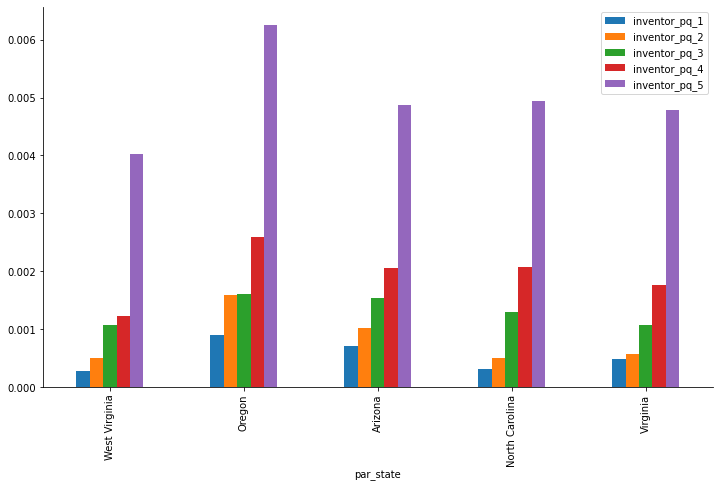

In [33]:
ax=income.plot(x = 'par_state',
               y = ['inventor_pq_1','inventor_pq_2','inventor_pq_3','inventor_pq_4','inventor_pq_5'], 
               kind = 'bar',
              figsize=(12, 7))
plt.xticks(rotation=90)
ax.legend()
sns.despine()
plt.show()

In [34]:
temp = tb1b[tb1b.columns[tb1b.columns.str.contains("r_pq_")]]
temp['par_state'] = tb1b['par_state']

/var/folders/yl/j915qyz94mn6844__n_h1dtr0000gn/T/ipykernel_97474/458697065.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



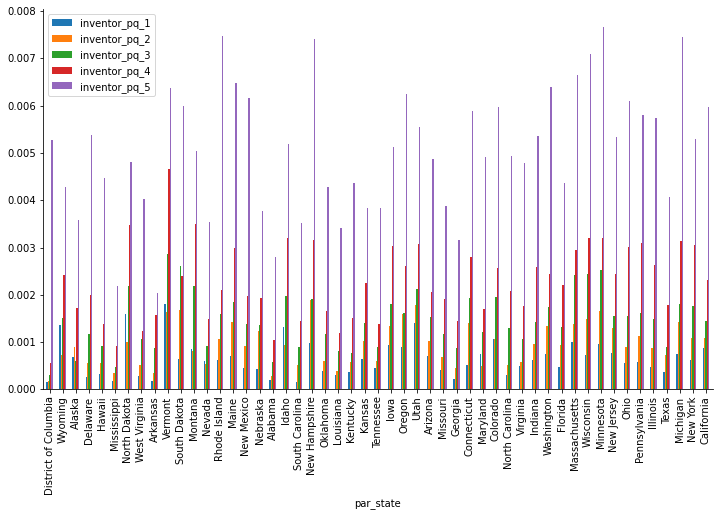

In [35]:
ax=temp.plot(x = 'par_state',
               y = ['inventor_pq_1','inventor_pq_2','inventor_pq_3','inventor_pq_4','inventor_pq_5'], 
               kind = 'bar',
              figsize=(12, 7))
plt.xticks(rotation=90)
ax.legend()
sns.despine()
plt.show()

## Q4
college

In [36]:
tb3.inventor.mean()

0.008809734515366445

In [37]:
tb3.inventor.std()

0.015702054824859125

In [38]:
tb1b.inventor.mean()

0.0021343078431372547

In [39]:
tb1b.inventor.std()

0.000815231739775418